# ASIGNATURA: INVESTIGACIÓN EN INTELIGENCIA ARTIFICIAL

### Laboratorio 2: Árboles y Random Forest para regresión


In [1]:
#Importamos todas las librerías.
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, Normalizer,StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import math
import time
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sys
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV

if not sys.warnoptions:
    warnings.simplefilter("ignore")

/Users/manuel.pasieka/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


https://www.kaggle.com/mailology1/bike-sharing-random-forest-regression

### Initial Data-Set exploration

In [2]:
filename = "Bike-Sharing-Dataset/hour.csv"
hour = pd.read_csv(filename)

In [3]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour.isnull().values.any()

False

In [5]:
hour.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [6]:
hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


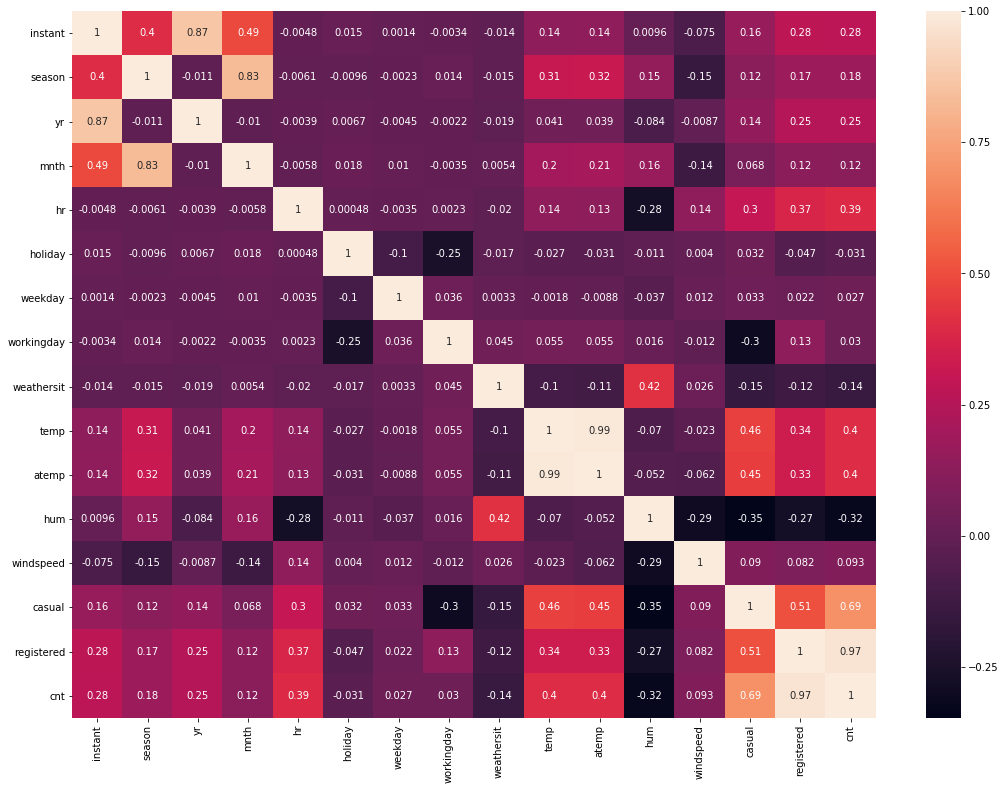

In [8]:
plt.figure(figsize=(18,13))
sns.heatmap(hour.corr(), annot=True)
plt.show()

# Eliminating Columns
Based on the correlation plot above and the type of somme of the columns, we a removing several columns.

In [9]:
hour.drop(columns=['instant', 'dteday', 'yr', 'mnth', 'temp', 'casual', 'registered'],inplace=True)

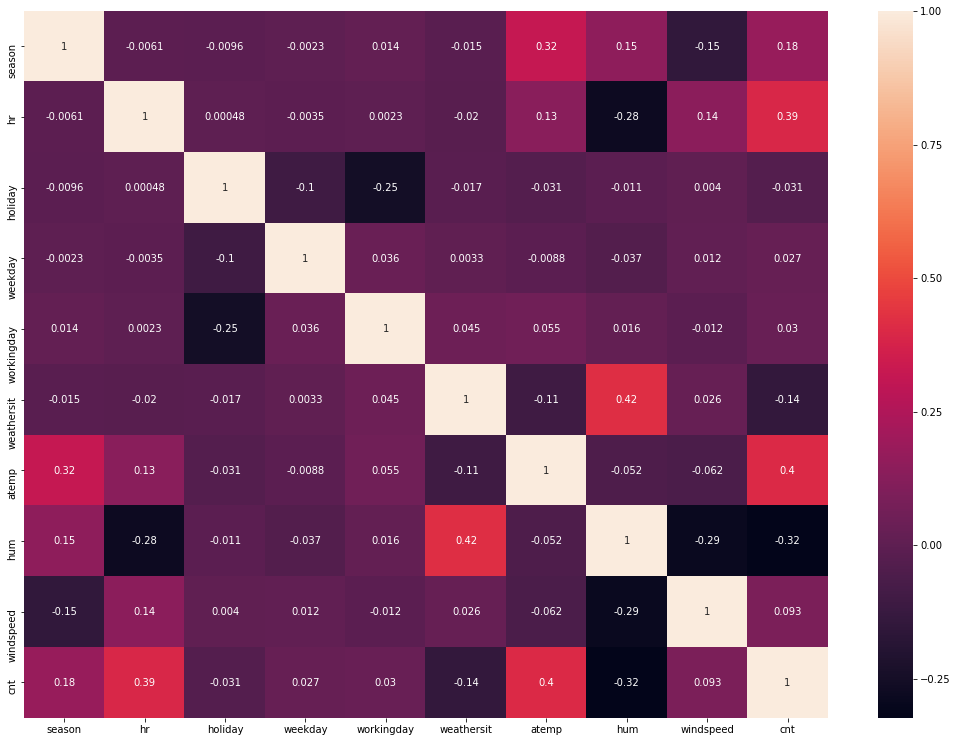

In [10]:
plt.figure(figsize=(18,13))
sns.heatmap(hour.corr(), annot=True)
plt.show()

### Treatment of Categorical Variables
In order for the decision trees to focus on specific values of categorical variables, we create one hot encoded dummy variables of several categorical variables.

In [11]:
hour_dummied = pd.DataFrame.copy(hour)
dummy_columns = ["season", "hr", "weekday", "weathersit"]
hour_dummied = pd.concat([hour_dummied.drop(dummy_columns, axis=1), pd.get_dummies(data=hour_dummied[dummy_columns], columns=dummy_columns)], axis=1)

In [12]:
hour_dummied.head()

,holiday,workingday,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.2879,0.81,0.0,16,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,0.2727,0.80,0.0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0.2727,0.80,0.0,32,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0.2879,0.75,0.0,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,0,0.2879,0.75,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


<hr>

### Randomize row order

In [13]:
#Randomize data
hour_rnd= hour_dummied.sample(frac=1)

In [14]:
hour_rnd.head()

,holiday,workingday,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
5277,0,1,0.6667,0.42,0.2239,385,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
11170,0,0,0.6364,0.39,0.3881,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
16853,0,1,0.3636,1.00,0.0896,20,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13011,0,0,0.7424,0.62,0.1045,142,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8172,0,1,0.2424,0.74,0.0000,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [15]:
X = hour_rnd.drop(['cnt'], 1)
y = hour_rnd.cnt

# Find the best model using the Out-of-bag Error

RandomForestRegressor, max_features='auto'
RandomForestRegressor, max_features='log2'
RandomForestRegressor, max_features=sqrt


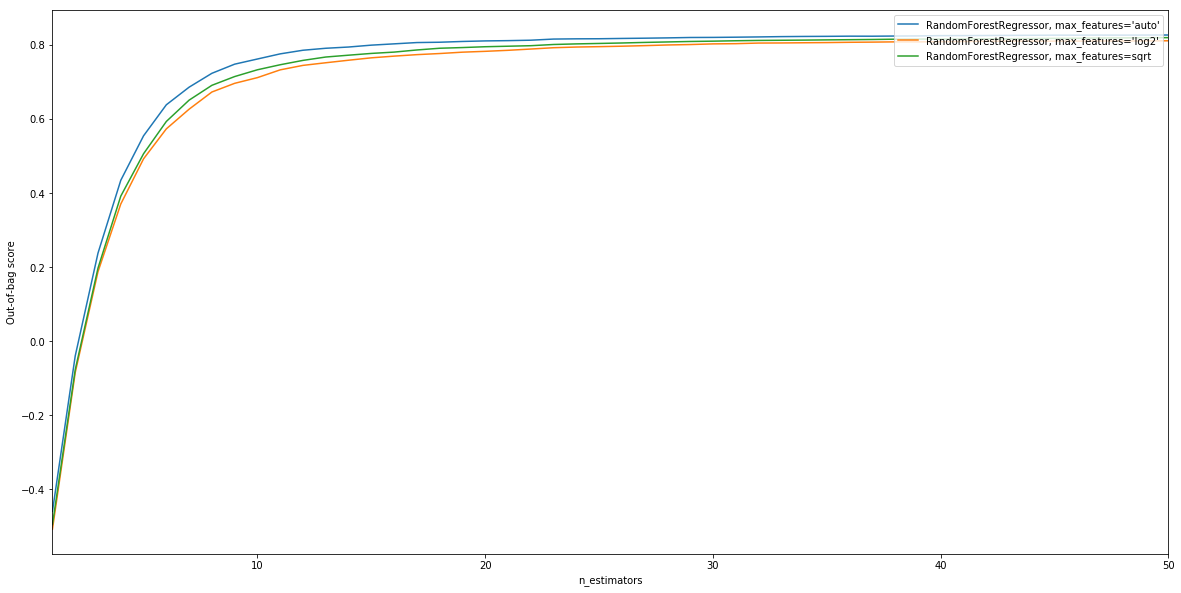

In [18]:
RANDOM_STATE = 123

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
        ("RandomForestRegressor, max_features='auto'",
        RandomForestRegressor(n_estimators=100,
                               max_features="auto",
                               oob_score= True, 
                               random_state=RANDOM_STATE, n_jobs=-1)),
        ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(n_estimators=100,
                               max_features='log2',
                               oob_score= True, 
                               random_state=RANDOM_STATE, n_jobs=-1)),
        ("RandomForestRegressor, max_features=sqrt",
        RandomForestRegressor(n_estimators=100,
                              max_features='sqrt',
                              oob_score= True, 
                            random_state=RANDOM_STATE, n_jobs=-1))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
score_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 50


for label, clf in ensemble_clfs:
    print(label)
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
    
        # Record the OOB error for each `n_estimators=i` setting.
        #score = clf.score(X,y)
        score = clf.oob_score_
        score_rate[label].append((i, score))

plt.figure(figsize=(20,10)) 
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in score_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("Out-of-bag score")
plt.legend(loc="upper right")
plt.show()

## OOB Results
The RandomForestRegressor with max_features='auto' and 20 Estimators seems to be a good choice as a model.

# Model Feature Analysis
Next study the importance of the different features and try to explain the model

In [29]:
clf = ensemble_clfs[0][1]

# Look at the mean feature importance
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns, columns=['importance'])
feature_importances.sort_values('importance', ascending=False, inplace=True)
feature_importances.head(10)

,importance
atemp,0.228640
hum,0.102544
workingday,0.096815
hr_17,0.091344
hr_18,0.077387
hr_8,0.056758
windspeed,0.036983
hr_19,0.031956
hr_7,0.018930
hr_2,0.014765


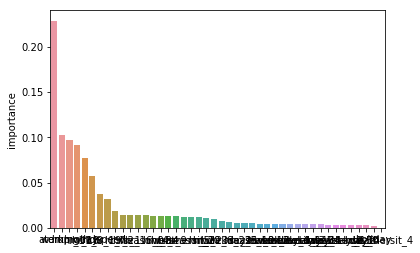

In [30]:
# Show the general distribution of importance
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.show()

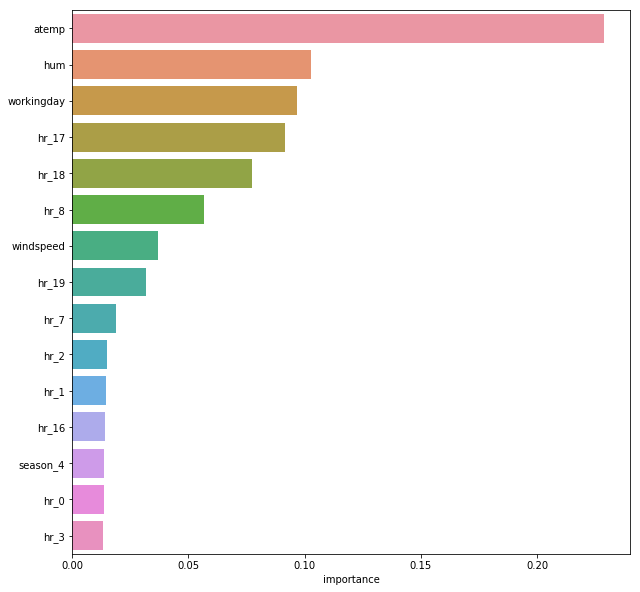

In [32]:
# Only look at the most important once
fig, ax = plt.subplots(figsize=(10, 10))
most_important_features = feature_importances[0:15]
sns.barplot(y=most_important_features.index, x=most_important_features['importance'], ax=ax)
plt.show()

# Feature Analysis
The most important features are temperature, humidity, workingday and the hour.

Looking at the dataset per hand and the specific features it seems that

* Temperature: Bikes are rented most in mid temperatures (aterm > 0.2 and < 0.8, corresponding to above 10 and below 40 degrees)
* Humidity: People like to bike most if mudity is between 30% and 90%
* Workingday: People prefare bikes on woring days
* Popular hours for renting bikes are 8am, 5-6pm

# Training a classifier

In [34]:
# Define a new group variable
def add_group(x):
    if x <= 20: 
        return 1
    else:
        return 2
hour_rnd['group'] = hour_rnd['cnt'].apply(add_group)
hour_rnd.head()


,holiday,workingday,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,group
5277,0,1,0.6667,0.42,0.2239,385,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2
11170,0,0,0.6364,0.39,0.3881,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2
16853,0,1,0.3636,1.00,0.0896,20,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
13011,0,0,0.7424,0.62,0.1045,142,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2
8172,0,1,0.2424,0.74,0.0000,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


RandomForestClassifier, max_features='auto'
RandomForestClassifier, max_features='log2'
RandomForestClassifier, max_features=sqrt


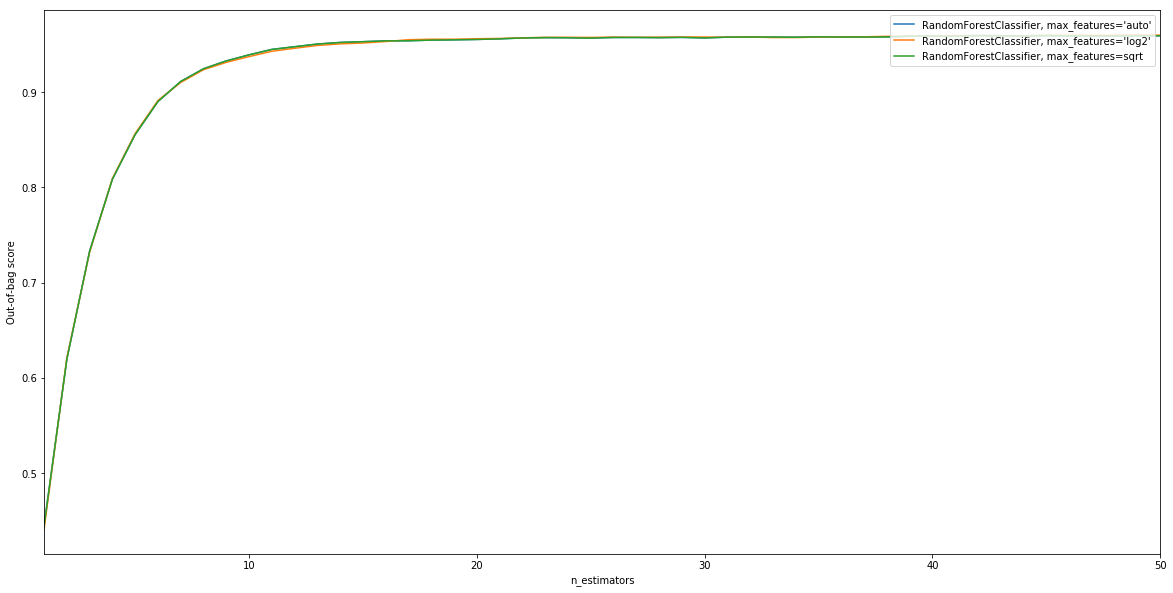

In [39]:
# Run again the OOB analysis using the group variable as target
X = hour_rnd.drop(['group', 'cnt'], 1)
y = hour_rnd.group

ensemble_clfs = [
        ("RandomForestClassifier, max_features='auto'",
        RandomForestClassifier(n_estimators=100,
                               max_features="auto",
                               oob_score= True, 
                               random_state=RANDOM_STATE, n_jobs=-1)),
        ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               max_features='log2',
                               oob_score= True, 
                               random_state=RANDOM_STATE, n_jobs=-1)),
        ("RandomForestClassifier, max_features=sqrt",
        RandomForestClassifier(n_estimators=100,
                              max_features='sqrt',
                              oob_score= True, 
                            random_state=RANDOM_STATE, n_jobs=-1))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
score_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 50


for label, clf in ensemble_clfs:
    print(label)
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
    
        # Record the OOB error for each `n_estimators=i` setting.
        #score = clf.score(X,y)
        score = clf.oob_score_
        score_rate[label].append((i, score))

plt.figure(figsize=(20,10)) 
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in score_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("Out-of-bag score")
plt.legend(loc="upper right")
plt.show()

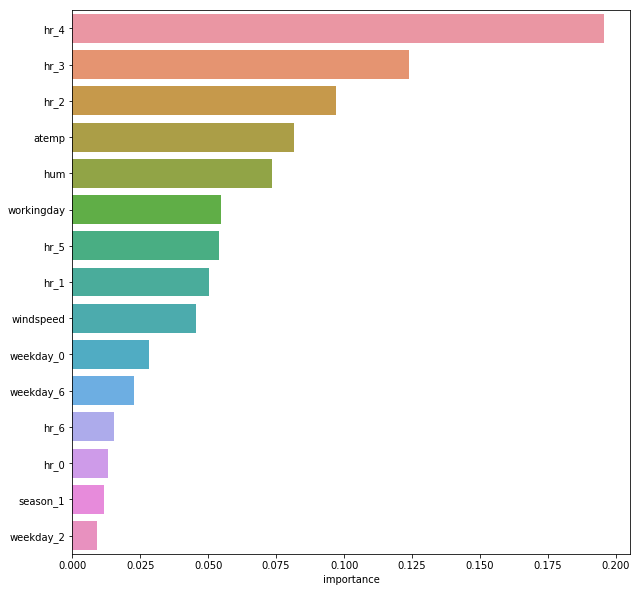

In [40]:
clf = ensemble_clfs[0][1]

# Look at the mean feature importance
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns, columns=['importance'])
feature_importances.sort_values('importance', ascending=False, inplace=True)
# Only look at the most important once
fig, ax = plt.subplots(figsize=(10, 10))
most_important_features = feature_importances[0:15]
sns.barplot(y=most_important_features.index, x=most_important_features['importance'], ax=ax)
plt.show()

# Explaining the features
Group == 1 are hours of very low bike usage, and in the feature importance this is reflected, making
the hours from 2-4am the once with the lowest usage and post predictive capacity.

In [ ]:
classifier = RandomForestClassifier()
classifier.set_params(**class_best_parameters)
classifier.fit(X_train,y_train)

class_best_accuracy = cross_val_score(estimator = classifier, X = X, y = y, cv =10)

In [ ]:
print("Final accuracy for Random Forest: "+ str(randForest_best_accuracy.mean()))
print("Final accuracy for Decision Tree: "+ str(decTree_best_accuracy))
print("Final accuracy for Classifier: "+ str(class_best_accuracy.mean()))

## Training a AdaBoostRegressor ???

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#AdaBoostRegressor for DecisionTreeRegressor with Grid Search HyperParameter Tuning
Adaregressor = AdaBoostRegressor()
parameters = [{'n_estimators' : [10,50,100,200], 
               'loss' : ['linear','square','exponential'], 
               'base_estimator' : [DecisionTreeRegressor(max_depth=4),DecisionTreeRegressor(max_depth=3),DecisionTreeRegressor(max_depth=5)]}]
grid_search = GridSearchCV(estimator = Adaregressor, param_grid = parameters)
grid_search = grid_search.fit(X, y)
decTree_best_parameters = grid_search.best_params_
decTree_best_accuracy = grid_search.best_score_

print("The accuracy for Decision Tree with Ada Boost is "+str(decTree_best_accuracy)+" using the parameters: "+str(decTree_best_parameters))

